<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 3.1.3

## Data

The Philippine Statistics Authority (PSA) spearheads the conduct of the Family Income and Expenditure Survey (FIES) nationwide. The survey, which is undertaken every three (3) years, is aimed at providing data on family income and expenditure, including, among others, levels of consumption by item of expenditure, sources of income in cash, and related information affecting income and expenditure levels and patterns in the Philippines.

You can download the data from [here](https://www.kaggle.com/grosvenpaul/family-income-and-expenditure).

The purpose of today's lab is to use simulation to visualize the sampling distribution for the sample mean. The Central Limit Theorem (CLT) tells us that as our sample size gets larger, the sampling distribution of the sample mean converges to a normal distribution. Therefore, when we have a large sample size, we can say that the sampling distribution for the sample mean is approximately normal, regardless of the distribution from which we are sampling.

Let's start by taking a look at the data, **`Total Household Income`** will serve as a "population" for the purposes of this lab. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
house_hold_csv = "Family Income and Expenditure.csv"
# Read CSV
house_hold = pd.read_csv("Family_Income_and_Expenditure.csv")

In [5]:
# Head
house_hold.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [12]:
# Tail
house_hold.tail()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0
41543,128598,XII - SOCCSKSARGEN,78195,Enterpreneurial Activities,1,43485,41205,1985,7735,2062,...,0,0,0,0,0,1,0,0,0,0


In [23]:
# Shape
house_hold.shape

(41544, 60)

In [25]:
# Data Types
house_hold.dtypes

Total Household Income                            int64
Region                                           object
Total Food Expenditure                            int64
Main Source of Income                            object
Agricultural Household indicator                  int64
Bread and Cereals Expenditure                     int64
Total Rice Expenditure                            int64
Meat Expenditure                                  int64
Total Fish and  marine products Expenditure       int64
Fruit Expenditure                                 int64
Vegetables Expenditure                            int64
Restaurant and hotels Expenditure                 int64
Alcoholic Beverages Expenditure                   int64
Tobacco Expenditure                               int64
Clothing, Footwear and Other Wear Expenditure     int64
Housing and water Expenditure                     int64
Imputed House Rental Value                        int64
Medical Care Expenditure                        

In [14]:
Total_Household_Income = house_hold[["Total Household Income"]]
Total_Household_Income

,Total Household Income
0,480332
1,198235
2,82785
3,107589
4,189322
...,...
41539,119773
41540,137320
41541,133171
41542,129500


#### Surveying the populations

##### 1. Create a histogram of `Total Household Income`.

array([[<AxesSubplot:title={'center':'Total Household Income'}>]],
      dtype=object)

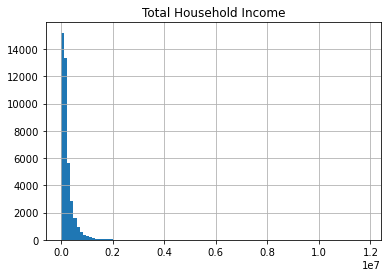

In [15]:
Total_Household_Income.hist(bins=100)

C:\Users\Monica\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

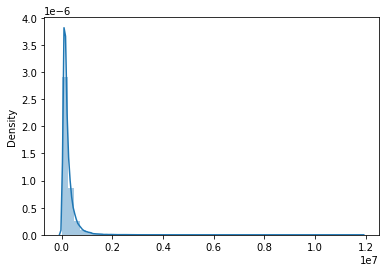

In [29]:
# ANSWER
sns.distplot(Total_Household_Income)

##### 2. How would you describe the shape of this population?

The Total Household Income histogram shows a right-skewed shape.
A distribution skewed to the right is said to be positively skewed. This kind of distribution has a large number of occurrences in the lower value cells (left side) and few in the upper value cells (right side). A skewed distribution can result when data is gathered from a system with has a boundary such as zero. In other words, all the collected data has values greater than zero.

In [16]:
Total_Household_Income.describe()

,Total Household Income
count,4.154400e+04
mean,2.475556e+05
std,2.868805e+05
min,1.128500e+04
25%,1.048950e+05
50%,1.640795e+05
75%,2.911385e+05
max,1.181599e+07


**ANSWER:**

##### 2. What is the mean income of this population?

In [3]:
# ANSWER
house_hold["Total Household Income"].mean()

247555.58480165608

In [17]:
Total_Household_Income.mean()

Total Household Income    247555.584802
dtype: float64

##### 3. What sampling statistic/point estimate would you use to estimate the mean of this population if you were given a random sample from the population?

**ANSWER:**

#### Simulated sampling (sample means)

Now, we'd like to get an idea of what happens when we take multiple random samples of size 5. 

Take 10 sample (size=5) from the entire population. Calculate means for each sample. Now make a histogram of all the sample means.

- Describe the shape of the histogram.
- What is the center of the distribution of sample means?

##### 4. Simulation with `sample_size=5`

Take 10 samples, but with a sample size of 5.

In [18]:
mean_list = []
for i in range (10):
    Total_Household_Income_sample = Total_Household_Income.sample(n=5)
    sample_mean = Total_Household_Income_sample.mean()
    mean_list.append(sample_mean)

In [65]:
mean_list

[Total Household Income    349878.6
 dtype: float64,
 Total Household Income    343812.0
 dtype: float64,
 Total Household Income    324536.0
 dtype: float64,
 Total Household Income    304091.4
 dtype: float64,
 Total Household Income    425737.6
 dtype: float64,
 Total Household Income    227985.0
 dtype: float64,
 Total Household Income    352851.6
 dtype: float64,
 Total Household Income    169199.2
 dtype: float64,
 Total Household Income    158527.0
 dtype: float64,
 Total Household Income    142733.0
 dtype: float64]

###### 4.A Make a histogram of all the sample means

C:\Users\Monica\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

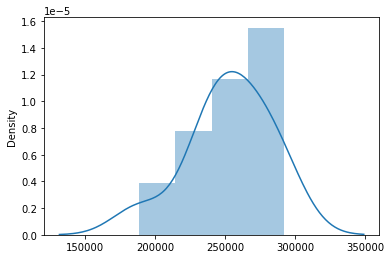

In [28]:
sns.distplot(mean_list)

###### 4.B Describe the shape of the histogram.

**ANSWER:**

The histogram for the sample_mean shows a skewed shape as the one for the Total Household Income histogram, but in this occasion is left-skewed.

##### 7. Simulation with `sample_size=15`

In [34]:
mean_list = []
for i in range (10):
    Total_Household_Income_sample = Total_Household_Income.sample(n=15)
    sample_mean = Total_Household_Income_sample.mean()
    mean_list.append(sample_mean)

In [35]:
mean_list

[Total Household Income    327811.533333
 dtype: float64,
 Total Household Income    183275.933333
 dtype: float64,
 Total Household Income    256924.133333
 dtype: float64,
 Total Household Income    239302.266667
 dtype: float64,
 Total Household Income    193296.4
 dtype: float64,
 Total Household Income    175905.466667
 dtype: float64,
 Total Household Income    135783.466667
 dtype: float64,
 Total Household Income    248061.733333
 dtype: float64,
 Total Household Income    199061.8
 dtype: float64,
 Total Household Income    183532.866667
 dtype: float64]

let's try taking another 1000 samples, but with a sample size of 15

C:\Users\Monica\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

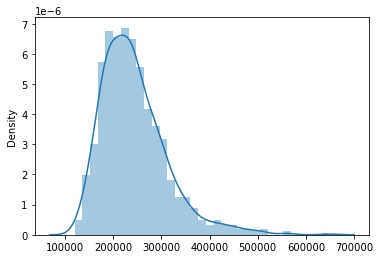

In [50]:
sns.distplot(mean_list)

In [48]:
mean_list = []
for i in range (1000):
    Total_Household_Income_sample = Total_Household_Income.sample(n=15)
    sample_mean = Total_Household_Income_sample.mean()
    mean_list.append(sample_mean)

In [51]:
mean_list

[Total Household Income    178880.866667
 dtype: float64,
 Total Household Income    201173.733333
 dtype: float64,
 Total Household Income    208634.6
 dtype: float64,
 Total Household Income    289895.0
 dtype: float64,
 Total Household Income    256733.333333
 dtype: float64,
 Total Household Income    276250.133333
 dtype: float64,
 Total Household Income    179542.533333
 dtype: float64,
 Total Household Income    240235.733333
 dtype: float64,
 Total Household Income    269128.533333
 dtype: float64,
 Total Household Income    276600.066667
 dtype: float64,
 Total Household Income    186118.8
 dtype: float64,
 Total Household Income    217233.266667
 dtype: float64,
 Total Household Income    224334.666667
 dtype: float64,
 Total Household Income    185156.0
 dtype: float64,
 Total Household Income    161261.466667
 dtype: float64,
 Total Household Income    242454.6
 dtype: float64,
 Total Household Income    245222.933333
 dtype: float64,
 Total Household Income    217501.0
 dt

C:\Users\Monica\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

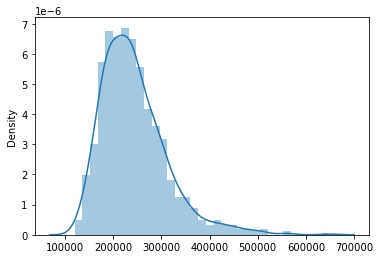

In [52]:
sns.distplot(mean_list)

In [38]:
sample_mean.median()

58.4

##### 8. Simulation with `sample_size=50`

Let's try taking another 1000 samples, but with a sample size of 50

In [ ]:
mean_list = []
for i in range (1000):
    Total_Household_Income_sample = Total_Household_Income.sample(n=50)
    sample_mean = Total_Household_Income_sample.mean()
    mean_list.append(sample_mean)

In [40]:
mean_list

[Total Household Income                           217599.58
 Total Food Expenditure                            83502.52
 Agricultural Household indicator                      0.36
 Bread and Cereals Expenditure                     24732.32
 Total Rice Expenditure                            17266.74
 Meat Expenditure                                   8881.08
 Total Fish and  marine products Expenditure       11365.38
 Fruit Expenditure                                  2313.60
 Vegetables Expenditure                             4708.00
 Restaurant and hotels Expenditure                 14662.66
 Alcoholic Beverages Expenditure                     914.54
 Tobacco Expenditure                                2590.88
 Clothing, Footwear and Other Wear Expenditure      4911.48
 Housing and water Expenditure                     29013.72
 Imputed House Rental Value                        14370.00
 Medical Care Expenditure                           7778.54
 Transportation Expenditure             

C:\Users\Monica\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

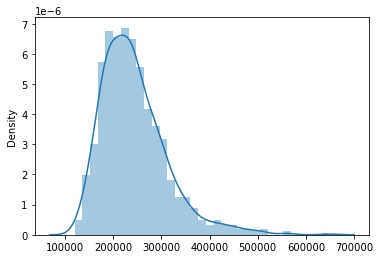

In [53]:
sns.distplot(mean_list)

In [57]:
sample_mean.median()

254473.197

###### 8.A Describe the shape of the histogram of sample means (using sample size of 50)

**ANSWER:**

The histogram for this sample_mean starts to show a normal distribution, still a little bit right-skewed

In [55]:
mean_list = []
for i in range (10000):
    Total_Household_Income_sample = Total_Household_Income.sample(n=1000)
    sample_mean = Total_Household_Income_sample.mean()
    mean_list.append(sample_mean)

In [56]:
mean_list

[Total Household Income    242714.096
 dtype: float64,
 Total Household Income    254153.886
 dtype: float64,
 Total Household Income    248030.641
 dtype: float64,
 Total Household Income    253082.125
 dtype: float64,
 Total Household Income    247669.454
 dtype: float64,
 Total Household Income    241466.363
 dtype: float64,
 Total Household Income    245445.855
 dtype: float64,
 Total Household Income    236937.373
 dtype: float64,
 Total Household Income    251970.179
 dtype: float64,
 Total Household Income    241080.366
 dtype: float64,
 Total Household Income    239160.498
 dtype: float64,
 Total Household Income    240199.518
 dtype: float64,
 Total Household Income    265372.842
 dtype: float64,
 Total Household Income    250831.4
 dtype: float64,
 Total Household Income    242137.72
 dtype: float64,
 Total Household Income    253152.119
 dtype: float64,
 Total Household Income    251059.593
 dtype: float64,
 Total Household Income    238824.318
 dtype: float64,
 Total Househ

C:\Users\Monica\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

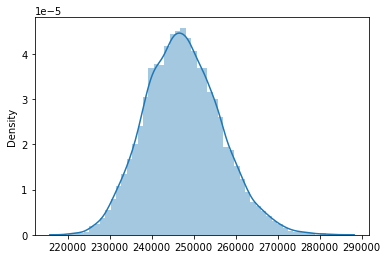

In [58]:
sns.distplot(mean_list)

In [59]:
sample_mean.median()

254473.197

When the sample is equal to 10000 and the size (n) is equal 1000, the shape of the histogram show a normal distribution.

###### 8.B What is mean of the distribution of sample means?

**ANSWER:**

> If repeated random samples of a given size n are taken from a population of values for a quantitative variable, where the population mean is μ (mu) and the population standard deviation is σ (sigma) then the mean of all sample means (x-bars) is population mean μ (mu).

###### 8.C As the sample size grew, did your results confirm the CLT?

**ANSWER:**

Yes, as the sample grew (in number and size), there is a confirmation of the Central Limit Theorem (CLT) which states that the distribution of sample approximates a normal distribution (also known as a “bell curve”) as the sample size becomes larger, assuming that all samples are identical in size, and regardless of the population distribution shape.



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



